In [22]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='9483661e-d1bf-4c67-abf0-8a2242fd8726', project_access_token='p-e219e2e59702a191100317b37abd572984bb5287')
pc = project.project_context


# Early diagnosis of diabetes mellitus

November 14, 1991 was proclaimed Diabetes Day to commemorate the fundamental work that has been and is being done around the world to close the gaps in public understanding of the disease. This date was chosen as a sign of respect and memory to the great scientist Frederick Bunting, who was born in 1891 on this day in 1891.

Diabetes mellitus is one of the most common diseases in the world. The disease is dangerous, first of all, uncontrolled hyperglycemia, leading to the development of complications affecting all the most important organs and systems of the body.  

The peculiarity of this disease is that external signs may not appear for several years after the onset of development. This leads to the fact that the pathology has time to cause significant harm to the body before treatment is started. Therefore, early diagnosis of diabetes is so important. 

But, in many countries, people do not have the opportunity to undergo laboratory blood tests and therefore remain without treatment. Can we diagnose diabetes with a high degree of probability for a number of signs without doing laboratory blood tests? This notebook is designed to answer this question through data analysis. 

Case Data is provided by [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.)

![alt-text](https://raw.githubusercontent.com/katyno/Early-diagnosis-of-diabetes-mellitus/main/diabetes.jpg "diabetes")

Since our question requires an answer - is the patient sick or not (yes / no), then in this case it is possible to use a classification approach based on the feature description. In this study, the attributes characterize the symptoms of diabetes mellitus and are binary (except for age), namely:

Attribute|---|---
:---|:---|:---
Age|16-90
Sex|1.Male|2.Female
Polyuria (excessive or frequent urination)|1.Yes|2.No
Polydipsia (unnaturally strong, unquenchable thirst)|1.Yes|2.No
Sudden weight loss|1.Yes|2.No
Weakness|1.Yes|2.No
Polyphagia (eating disorder, manifested by increased appetite and gluttony)|1.Yes|2.No
Genital thrush|1.Yes|2.No
Visual blurring|1.Yes|2.No
Itching|1.Yes|2.No
Irritability|1.Yes|2.No
Delayed healing|1.Yes|2.No
Partial paresis (muscle weakness due to damage to nerve tissue)|1.Yes|2.No
Muscle stiffness|1.Yes|2.No
Alopecia (baldness)|1.Yes|2.No
Obesity|1.Yes|2.No
Class|1.Positive|2.Negative

In [23]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_be2e7e6fed92462cb93d5909c22ea30b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MHzIbHfWJ2DXt4CRYCyVVLA2OGXGK-rwT63BMvBBnrII',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_be2e7e6fed92462cb93d5909c22ea30b.get_object(Bucket='datasciencemethodology-donotdelete-pr-7xwfrrfffjvime',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [24]:
print('Project Name: {0}'.format(project.get_name()))
print('Project Description: {0}'.format(project.get_description()))
print('Projext Bucket Name: {0}'.format(project.get_project_bucket_name()))
print('Project Assets (Connections): {0}'.format(project.get_assets(asset_type='connection')))
print('Project Files: {0}'.format(project.get_files()))

Project Name: Data Science Methodology
Project Description: This is my Final Assignment on Data Science Methodology
Projext Bucket Name: datasciencemethodology-donotdelete-pr-7xwfrrfffjvime
Project Assets (Connections): []
Project Files: [{'name': 'diabetes.csv', 'asset_id': '98cc1684-52cb-46b7-80ed-8fde8ecbf587'}]


We can find the dimensions of the data set using the panda Dataframes’ ‘shape’ attribute.

In [25]:
print("Diabetes data set dimensions : {}".format(df_data_1.shape))

Diabetes data set dimensions : (520, 17)


We can notice that the dataset contains 520 rows and 17 columns. "Class" is the column that we are going to predict and it indicates whether the patient has diabetes or not. "Positive" means that the person is diabetic and "Negative" means that the person is not sick. We can determine how many out of 520 people have diabetes, and how many do not.

In [26]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df_data_1.columns 

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual blurring',
       'Itching', 'Irritability', 'Delayed healing', 'Partial paresis',
       'Muscle stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')

In [27]:
df_data_1.groupby('Class').size()

Class
Negative    200
Positive    320
dtype: int64

Now we can see that out of 520 people, 200 are labeled as "Negative" (non-diabetics) and 320 as "Positive" (diabetics).

Data visualization is a must-have aspect of data science. This helps to understand the data as well as explain it to another person. Python has some interesting visualization libraries like Matplotlib, Seaborn, etc. 

We can use the following code to draw histograms for the two responses separately. 

Class
Negative    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Positive    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

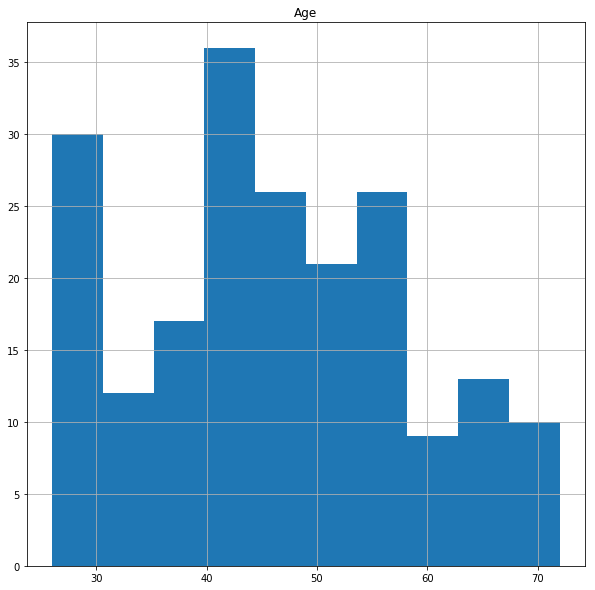

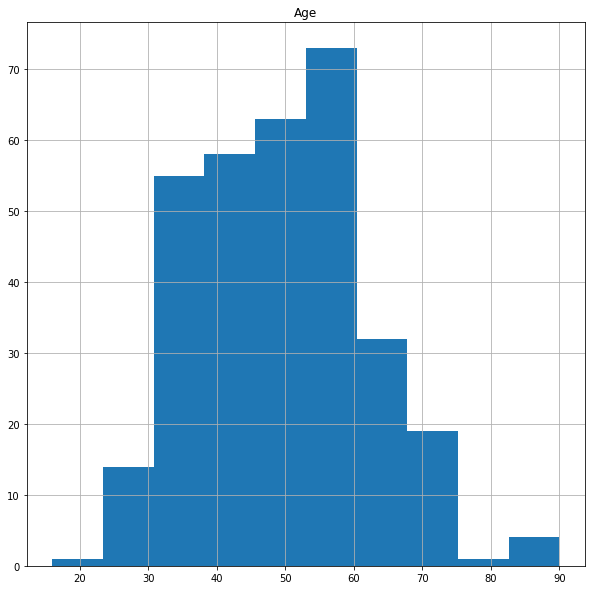

In [28]:
df_data_1.groupby('Class').hist(figsize=(10, 10))

We can see that the most at risk are people aged 30-60.

The next phase of the machine learning work flow is data cleaning. Considered to be one of the crucial steps of the workflow, because it can make or break the model. There are several factors to consider in the data cleaning process.
1. Duplicate or irrelevant observations.
2. Bad labeling of data, same category occurring multiple times.
3. Missing or null data points.
4. Unexpected emissions.

Since we are using a standard data set, we can safely assume that factors 1, 2 are already dealt with. 

Find any missing or null data points in the dataset (if any) we can use the following pandas function.

In [29]:
df_data_1.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden weight loss    0
Weakness              0
Polyphagia            0
Genital thrush        0
Visual blurring       0
Itching               0
Irritability          0
Delayed healing       0
Partial paresis       0
Muscle stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

In [30]:
df_data_1.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden weight loss    0
Weakness              0
Polyphagia            0
Genital thrush        0
Visual blurring       0
Itching               0
Irritability          0
Delayed healing       0
Partial paresis       0
Muscle stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

We can observe that there are no data points missing in the data set.

By analyzing the histogram, we can determine that there are no significant outliers.

Let's check the distribution of data types in the DataFrame.

In [31]:
df_data_1.dtypes.value_counts()

object    16
int64      1
dtype: int64

We can see that out of 17 columns, 16 have data type object. Let's binarize these columns.

In [32]:
df_data_1['Gender'] = df_data_1['Gender'].apply(lambda x: 1 if x == "Male" else 2)
df_data_1['Polyuria'] = df_data_1['Polyuria'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Polydipsia'] = df_data_1['Polydipsia'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Sudden weight loss'] = df_data_1['Sudden weight loss'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Weakness'] = df_data_1['Weakness'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Polyphagia'] = df_data_1['Polyphagia'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Genital thrush'] = df_data_1['Genital thrush'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Visual blurring'] = df_data_1['Visual blurring'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Itching'] = df_data_1['Itching'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Irritability'] = df_data_1['Irritability'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Delayed healing'] = df_data_1['Delayed healing'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Partial paresis'] = df_data_1['Partial paresis'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Muscle stiffness'] = df_data_1['Muscle stiffness'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Alopecia'] = df_data_1['Alopecia'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Obesity'] = df_data_1['Obesity'].apply(lambda x: 1 if x == "Yes" else 2)
df_data_1['Class'] = df_data_1['Class'].apply(lambda x: 1 if x == "Positive" else 2)

Let's check our data again.

In [33]:
df_data_1.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,1,2,1,2,1,2,2,2,1,2,1,2,1,1,1,1
1,58,1,2,2,2,1,2,2,1,2,2,2,1,2,1,2,1
2,41,1,1,2,2,1,1,2,2,1,2,1,2,1,1,2,1
3,45,1,2,2,1,1,1,1,2,1,2,1,2,2,2,2,1
4,60,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1


In [34]:
df_data_1.dtypes.value_counts()

int64    17
dtype: int64

Now all our data belongs to a binary numeric type and we can start modeling. Let's split the dataset into functions and the response we're going to predict. Let's assign the characteristics to the variable X, and the answer to the variable y.

In [35]:
diabetes_mod = df_data_1
feature_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual blurring',
       'Itching', 'Irritability', 'Delayed healing', 'Partial paresis',
       'Muscle stiffness', 'Alopecia', 'Obesity', 'Class']
X = diabetes_mod[feature_names]
y = diabetes_mod.Class

Model selection or algorithm selection phase is the most exciting and the heart of machine learning. It is the phase where we select the model which performs best for the data set at hand.

First, we will be calculating the “Classification Accuracy (Testing Accuracy)” of a given set of classification models with their default parameters to determine which model performs better with the diabetes data set.

We will import the necessary libraries for the notebook. We import 7 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest, and Gradient Boost to be contenders for the best classifier.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

We will initialize the classifier models with their default parameters and add them to a model list.

In [37]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

To avoid overfitting, I use two methods: training / test split and K-Fold cross validation. I will import “train_test_split” for train/test split and “cross_val_score” for k-fold cross-validation. “accuracy_score” is to evaluate the accuracy of the model in the train/test split method.

In [38]:
from sklearn.model_selection import train_test_split

Let's split our dataset into two parts: a training set and a testing set.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Class, random_state=0)

Then we put each model in a loop and calculate the accuracy of the corresponding model using "precision_score".

In [40]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.892308
1  SVC  0.615385
2   LR  1.000000
3   DT  1.000000
4  GNB  1.000000
5   RF  1.000000
6   GB  1.000000


We see indicators of separation accuracy in train/test.

But while the train / test split is useful because of its flexibility and speed, its disadvantage is the high variance in the out-of-sample accuracy estimate.

Let's try K-Fold cross validation now. 

This method splits the dataset into K equal sections ("folds"), then uses 1 fold as the test set, and concatenates the other folds as the training set. The model is then checked for accuracy. The process will repeat the above steps K times, each time using a different fold as a test kit. The average accuracy of the testing process is the accuracy of testing.

We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. “cross_val_score” provides its own training and accuracy calculation interface.

Train the models using 10-fold cross-validation and calculate the average accuracy of the models. Cross_val_score provides its own interface for training and calculating accuracy.

In [42]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.919231
1  SVC  0.615385
2   LR  1.000000
3   DT  1.000000
4  GNB  1.000000
5   RF  1.000000
6   GB  1.000000


We see the K-cross validation accuracy metrics. The advantages of this method are more accurate estimation of out-of-sample accuracy, as well as more "efficient" use of data (each observation is used for both training and testing). The downside is that this method is much slower than the train/test split.

This method is preferable to use where the computing power is not limited.

We can build precision estimates using seaborn.

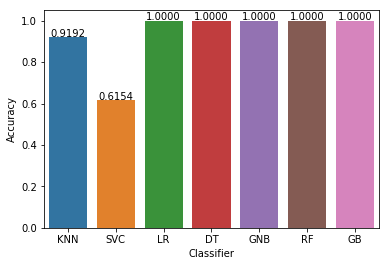

In [43]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

We can see the Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boosting have performed better than the rest. From the base level we can observe that the Logistic Regression performs better than the other algorithms.

Basic Logistic Regression, Gaussian Naive Bayesian Analysis, Random Forest and Gradient Improvement, Gaussian Naive Bayesian Analysis, Random Forest, and Gradient Improvement achieved a classification accuracy of 100%. Logistic Regression will be chosen as the main candidate for the next steps.

Let's go back to developing features. 

Sometimes there are features that don't improve the model. Such cases can be found by further analysis of the features related to the model. Therefore we will be analyzing the selected model which is Logistic Regression, and how feature importance affects it.

Scikit Learn provided useful methods by which we can do feature selection and find out the importance of features which affect the model.

   1. Univariate Feature Selection: Statistical tests can be used to select those features that have the strongest relationship with the output variable.

   2. Recursive Feature Elimination: The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
   3. Principal Component Analysis: Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.
   4. Feature Importance: Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.
   
I will be using Recursive Feature Elimination as the feature selection method. First I import RFECV, which comes with inbuilt cross validation feature. Same as the classifier model, RFECV has the fit() method which accepts features and the response/target.

In [44]:
from sklearn.feature_selection import RFECV

In [47]:
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

After fitting, it exposes an attribute grid_scores_ which returns a list of accuracy scores for each of the features selected. We can use that to plot a graph to see the no of features which gives the maximum accuracy for the given model.

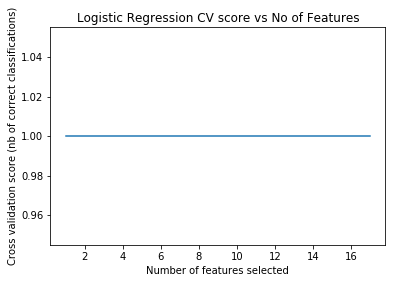

In [48]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

The choice of characteristics is primarily aimed at removing uninformative or redundant predictors from the model. Looking at the graph, we see that no matter how many characteristics we take, in this case it does not affect the accuracy estimate.

The next step is to configure the parameters of the model. Scikit Learn provides the model with sensible default parameters which gives decent accuracy scores. It also provides the user with the option to tweak the parameters to further increase the accuracy. But given that our dataset, as the logistic regression function importance graph shows, is a set of precise characteristics, we do not need to tweak the parameters to further improve accuracy.

### Conclusion

In this study, I have provided my understanding of data science methodology, applying it to the early diagnosis of diabetes. Consecutively, I went through a number of stages:
   1. Described a problem related to my chosen topic.
   2. Formulated the problem as a question to be answered using data.
   3. Used an analytical approach.
   4. Passed the stage of data requirements and information collection.
   5. Studied and prepared data for research.
   6. Carried out modeling and evaluation of these data.